<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 30px; color: #3a5a40; text-align: center; line-height: 1.25;"><b>🍴predict profits for a restaurant franchise🍴<b/></h1>

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 30px; color: #3a5a40; text-align: center; line-height: 1.25;"><b>And<b/></h1>
      
<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 30px; color: #3a5a40; text-align: center; line-height: 1.25;"><b>💰 House pricing 💰<b/></h1>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">Table of Contents</p>

- [**1 - Importing Libraries**](#1)
- [**2 - Linear Regression with One Variable**](#2)
    - [**2 - 1 Overview**](#2-1)
    - [**2 - 2 Loading Dataset**](#2-2)
    - [**2 - 3 Exploring the data**](#2-3)
    - [**2 - 4 Visualizing the data**](#2-4)
    - [**2 - 5 Compute Cost**](#2-5)
    - [**2 - 6 Gradient descent**](#2-6)
- [**3- Linear Regression with Multiple Variable**](#3)
    - [**3 - 1 Overview**](#3-1)
    - [**3 - 2 Loading Dataset**](#3-2)
    - [**3 - 3 Exploring the data**](#3-3)
    - [**3 - 4 Feature Normalization**](#3-4)
    - [**3 - 5 Compute Cost**](#3-5)
    - [**3 - 6 Gradient descent**](#3-6)
-[**4- Linear Regression using Scikit-Learn**](#4)


<a name = 1></a>
<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">1 - Importing libraries</p>

In [1]:
# Data Analysis and Manipulation Libraries Import
import numpy as np
import pandas as pd

# Data Visualization Libraries Import
from matplotlib import pyplot as plt
import seaborn as sns

# Python Standard Libraries Import
import copy
import math

#ignore all the warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#display Matplotlib plots directly within the notebook
%matplotlib inline
# display graphs correctly
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['figure.dpi'] = 120

# Apply the 'ggplot' style
plt.style.use('dark_background')

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;"> 2 -Linear Regression with one Variable</p>
<a name = 2></a>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">2 -1 Overview</p>
<a name = 2-1></a>


 <h3><b>Hello everyone 😊😊</b></h3>
This is the first project I have undertaken, and I would appreciate any additional features or improvements you may suggest.<br> 
So in this project, we will implement a linear regression model with a single variable to make predictions regarding the profitability of a food truck . <br>


Imagine that you are the CEO of a restaurant franchise and want to open a new outlet in diffrent cities, you know the profits and population figure for each city, the dataset is stored in a file named ex1data1.txt, within this dataset, we have two columns of information:
- ***the first column represents the population of each city***
- ***the second column represents the profit generated by food truck in that specific city.***
<h3 style="text-align: right;"><b>Let's have fun 😄😊</b></h3>

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">2 -2 Leading dataset</p>
<a name = 2-2></a>

In [3]:
#let's explore all the files that is existe in my repository
import os
print(os.listdir("../input/coursera-machine-learning-su-ex1"))

['ex1data2.txt', 'ex2data2.txt', 'ex2data1.txt', 'ex1data1.txt']


In [4]:
#read the data
df = pd.read_csv('/kaggle/input/coursera-machine-learning-su-ex1/ex1data1.txt', names=['population', 'profit'])
#git the data treaning
X = df.iloc[:,0] #the first column
Y = df.iloc[:,1] # the seconde column
m = df.shape[0] #the number of training example
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">2 -3 Exploring the data </p>
<a name = 2-3></a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [6]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [7]:
df.dtypes

population    float64
profit        float64
dtype: object

In [8]:
df.isnull().sum()

population    0
profit        0
dtype: int64

In [9]:
df.corr()

,population,profit
population,1.000000,0.837873
profit,0.837873,1.000000


<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">2 -4 Visualizing the data</p>
<a name = 2-4></a>

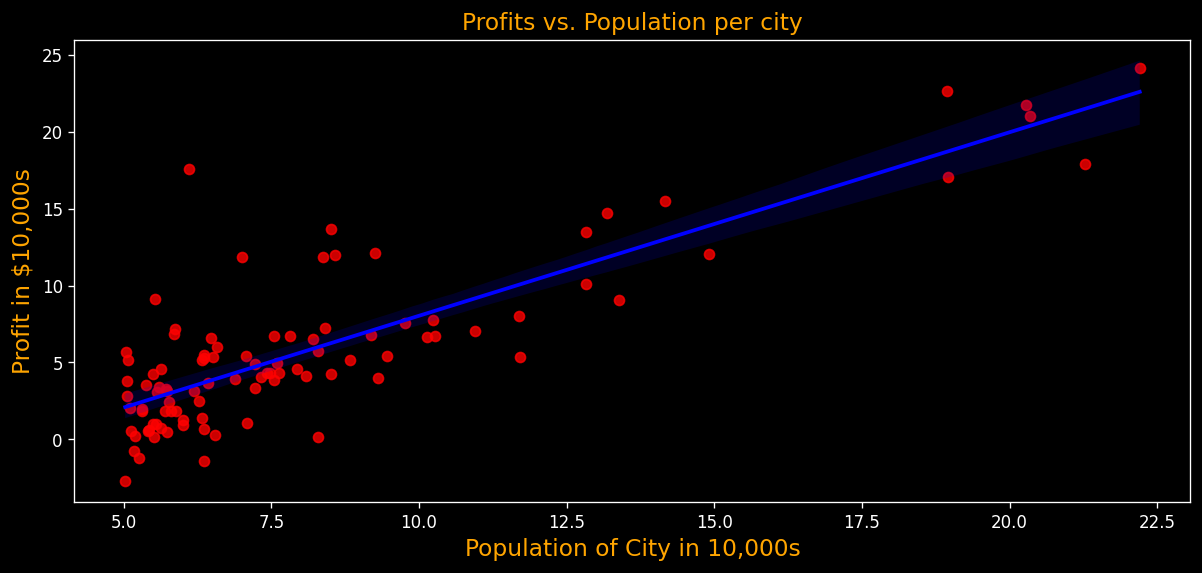

In [10]:
#Plot Data
sns.regplot(x=X, y=Y,data = df,scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title("Profits vs. Population per city",color ="orange",size = 14)
plt.xlabel('Population of City in 10,000s',color ="orange",size = 14)
plt.ylabel('Profit in $10,000s',color ="orange",size = 14)
plt.show()

<Axes: >

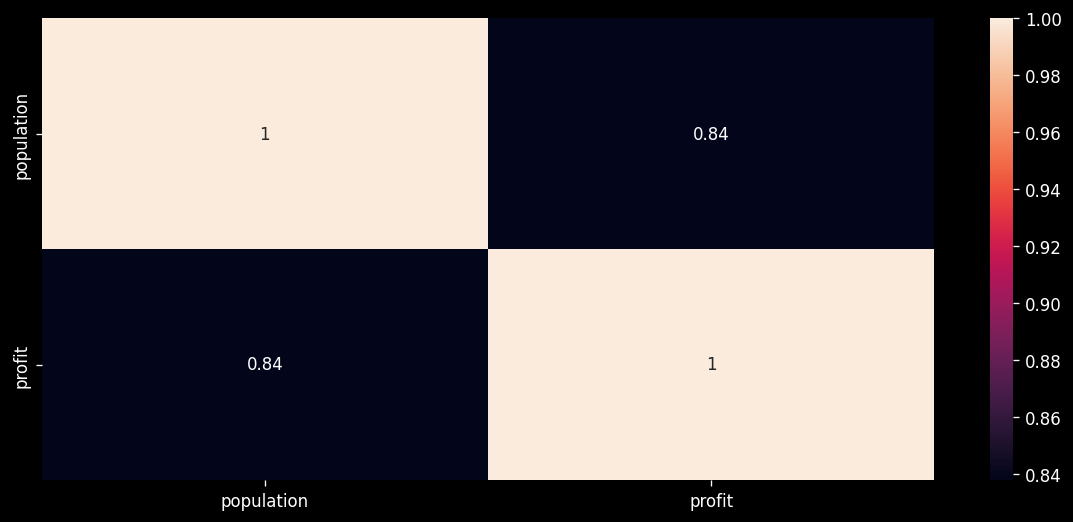

In [11]:
correlation_matrix =df.corr()
sns.heatmap(correlation_matrix,annot = True)

**conclusion : there is a strong correlation exists between population and profit.**

<a name = 2-5></a>
<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">2 -5 Compute Cost</p>

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [12]:
def compute_cost(x,y,w,b):
    final_cost = 0
    cost = 0
    for i in range(m):
        cost = cost + ( (w * x[i] + b) - y[i]) ** 2
    final_cost = (1 / (2 * m) ) * cost
    return final_cost

In [13]:
#TEST 
initial_w = 0.5
initial_b = 1

cost = compute_cost(X, Y, initial_w, initial_b)
print(f'Cost at initial w: {cost:.3f}')

Cost at initial w: 8.325


**The goal is to find the optimal values of  w and b that minimize the cost.**

<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">2 -6 Gradient descent</p>
<a name = 2-6></a>
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w}   \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) 
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
$$

In [14]:
def compute_gradient(x, y, w, b): 
    dj_dw = 0
    dj_db= 0
    for i in range(m) :
        dj_dw+= ((w * x[i] )+ b - y[i]) * x[i]
        dj_db+=  (w * x[i] )+ b - y[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [15]:
#test
tmp_dj_dw, tmp_dj_db = compute_gradient(X,Y, initial_w, initial_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -16.46707833452577 -0.759235051546392


In [16]:
#now we will do the last step is Learning parameters 
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,number_iterations):
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(number_iterations):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, a,lpha and gradient
        
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        
        if i<100000:
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(number_iterations/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [17]:
# initialize fitting parameters. Recall that the shape of w is (n,)
# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(X ,Y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.72   
Iteration  150: Cost     5.75   
Iteration  300: Cost     5.22   
Iteration  450: Cost     4.91   
Iteration  600: Cost     4.73   
Iteration  750: Cost     4.62   
Iteration  900: Cost     4.56   
Iteration 1050: Cost     4.53   
Iteration 1200: Cost     4.51   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.1600541103005177 -3.567498418691902


**if we increase the number of iterations, we will observe that the minimum value of 4.48 is reached at iteration 1500**

Text(0, 0.5, 'Profit in $10,000s')

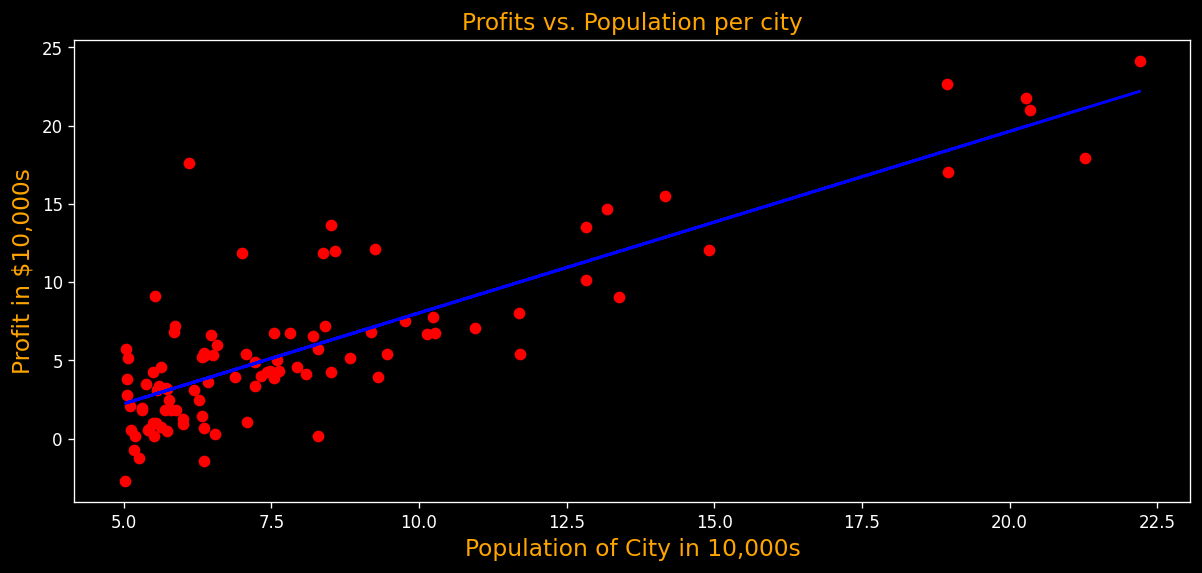

In [18]:
#calculate the prediction for each example.

predicted = np.zeros(m)
predicted = np.dot(w , X) + b

# Plot the linear fit
plt.plot(X, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X,Y, c='r') 
plt.title("Profits vs. Population per city",color ="orange",size = 14)
plt.xlabel('Population of City in 10,000s',color ="orange",size = 14)
plt.ylabel('Profit in $10,000s',color ="orange",size = 14)


<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">3- Linear Regression with Multiple Variable</p>
<a name = 2></a>



<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">3 -1 Overview</p>
<a name = 3-1></a>

 Imagine you're in the process of selling your house, and you're eager to determine a fair market price for it. One effective approach is to gather data on recent home sales and construct a model that predicts housing prices. Your task revolves around using various factors to forecast these prices accurately.
 
The dataset **ex1data2.txt** provides a training set of housing prices. Each row consists of three columns: <br>
**the first column represents the house's size in square feet**<br>
**the second column signifies the number of bedrooms,**<br>
**the third column denotes the corresponding house price.**


<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">3 - 2 Loading Dataset</p>
<a name = 3-2></a>

In [19]:
#read the data
df1 = pd.read_csv('/kaggle/input/coursera-machine-learning-su-ex1/ex1data2.txt', names=['house size', 'num beds','price'])
# git the data treaning
X = df1.iloc[:,0:2] #the first column and the seconde column
Y = df1.iloc[:,2] # the third column
m,n = X.shape 
df1.head()

,house size,num beds,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900




<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">3 - 3 Exploring the data</p>
<a name = 3-3></a>

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   house size  47 non-null     int64
 1   num beds    47 non-null     int64
 2   price       47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [21]:
df1.describe()

,house size,num beds,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [22]:
df1.isnull().sum()

house size    0
num beds      0
price         0
dtype: int64

In [23]:
df1.corr()

,house size,num beds,price
house size,1.000000,0.559967,0.854988
num beds,0.559967,1.000000,0.442261
price,0.854988,0.442261,1.000000


**there is a strong correlation between the size of a house and its price.**



<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">3 -4 Feature Normalization</p>
<a name = 3-4></a>

**when analyzing the data, it's important to observe that house sizes typically have larger values compared to the number of bedrooms. When dealing with features that vary significantly in scale, it is advisable to begin by performing feature scaling, as it can greatly expedite the convergence of gradient descent algorithms.**

In [24]:
def zscore_normalize_features(X):

    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
X_norm, _, _ = zscore_normalize_features(X)

In [25]:
X_norm.head()

,house size,num beds
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205




<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">3 -5 Compute the cost function</p>
<a name = 3-5></a>

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  $$ 



In [26]:
def compute_cost(X, Y, w, b): 
    cost = 0.0
    m = len(Y)
    for i in range(m):                                
        f_wb_i =np.dot( X [i],w) + b       
        cost = cost + (f_wb_i - Y[i])**2       
    cost = cost / (2 * m)                      
    return cost

In [27]:
#test 
w_init = np.array([0.00001, 100000])
b= 0.
X_norm = X_norm.to_numpy()
Y = Y.to_numpy()
cost = compute_cost(X_norm,Y,w_init,b)
cost

65120665930.37282



<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">3 -6 Gradient descent function</p>
<a name = 3-6></a>

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}\; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \ \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \
\end{align}
$$

In [28]:
def compute_gradient(X, Y, w, b): 
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - Y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                            
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw


In [29]:
#test
gradient = compute_gradient(X_norm,Y,w_init,b)
gradient

(-340412.659574468, array([-49767.41304904,  45291.17824973]))

In [30]:
def gradient_descent(X, Y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 

    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient 
        dj_db,dj_dw = gradient_function(X, Y, w, b) 

        # Update Parameters
        w = w - alpha * dj_dw              
        b = b - alpha * dj_db           
      
        # Save cost J at each iteration
        if i<100000: 
            J_history.append( cost_function(X, Y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history

In [31]:
#test
iterations = 1500
alpha = 10.0e-3

# Run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm, Y,w_init,b, compute_cost, compute_gradient, alpha, iterations)

print(f"b, w found by gradient descent: {b_final:.2f}, {w_final}")


Iteration    0: Cost 63922471505.35   
Iteration  150: Cost 6183496655.93   
Iteration  300: Cost 2540810350.88   
Iteration  450: Cost 2146111899.85   
Iteration  600: Cost 2069212113.94   
Iteration  750: Cost 2050115218.76   
Iteration  900: Cost 2045096974.94   
Iteration 1050: Cost 2043763784.17   
Iteration 1200: Cost 2043408875.95   
Iteration 1350: Cost 2043314360.51   
b, w found by gradient descent: 340412.56, [109303.05477637  -6433.61316105]


In [32]:
m,_ = X_norm.shape
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {Y[i]}")

prediction: 356231.27, target value: 399900
prediction: 286161.88, target value: 329900
prediction: 397383.13, target value: 369000
prediction: 269126.74, target value: 232000
prediction: 472253.32, target value: 539900
prediction: 331141.35, target value: 299900
prediction: 276986.12, target value: 314900
prediction: 262110.28, target value: 198999
prediction: 255576.03, target value: 212000
prediction: 271425.06, target value: 242500
prediction: 324885.15, target value: 239999
prediction: 341772.50, target value: 347000
prediction: 326479.58, target value: 329999
prediction: 669188.83, target value: 699900
prediction: 240005.05, target value: 259900
prediction: 374934.72, target value: 449900
prediction: 255780.19, target value: 299900
prediction: 235556.20, target value: 199900
prediction: 417893.93, target value: 499998
prediction: 476563.14, target value: 599000
prediction: 309379.31, target value: 252900
prediction: 334747.29, target value: 255000
prediction: 286717.98, target va



<p style="background-color:#93CDDD; font-family: 'Trebuchet MS'; font-weight: bold; color: #3a5a40; font-size: 40px; text-align: center; border-radius: 50px; padding: 10px;">4 -  Linear Regression using Scikit-Learn</p>
<a name = 4></a>

### normalize the training data

In [33]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_Scal = scaler.fit_transform(X)

### Create and fit the regression model

In [34]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_Scal, Y)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 135, number of weight updates: 6346.0


In [35]:
b_Scal = sgdr.intercept_
w_Scal = sgdr.coef_
print(f"model parameters:                   w: {w_Scal}, b:{b_Scal}")

model parameters:                   w: [108477.04732334  -5629.02661258], b:[340437.24749651]


In [36]:
y_pred_sgd = sgdr.predict(X_Scal)
print(f"{y_pred_sgd}" )

[355965.49003312 286425.61500909 396806.36901549 268515.06938787
 472114.90672004 332069.32507441 277319.20280356 262555.7769552
 256070.90765732 271800.16510324 325860.40766155 341615.99201229
 326438.63833641 668566.32194661 240617.60209643 375531.74696443
 255269.3789071  236202.37193617 418166.31319941 476392.16093779
 309467.59740792 333639.71425165 286977.51877912 328895.87839672
 602390.52335242 217437.64375508 266833.03117295 414191.3377715
 369211.18051389 429506.66738989 326878.89306876 218594.1051048
 339658.00191235 498494.63864389 308061.51107802 263935.53638028
 236616.2997637  352351.78862309 639755.67686727 356491.06689833
 302733.10312986 374454.26632919 412371.32361407 231235.23800588
 190696.63781336 313718.52472084 231649.16583341]


<h1 style="font-family: Trebuchet MS; font-size: 20px; color: #52b788; text-align: left; "><b>Thank You</b></h1>
<h1 style="font-family: "Trebuchet MS"; font-size: 1px; color: #264653; text-align: center; "> <b>Created By: Hassane Skikri</b></h1>